In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [3]:
# Reading whale returns
whale_returns = Path("../Resources/whale_returns.csv")
whale_pd = pd.read_csv(whale_returns,index_col="Date", parse_dates=True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# drop nulls
whale_pd.dropna(inplace=True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [12]:
# reading algorithmic returns
algo_returns = Path("../Resources/algo_returns.csv")
algo_pd = pd.read_csv(algo_returns,index_col="Date", parse_dates=True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [13]:
# count nulls
algo_pd.isnull().sum

<bound method DataFrame.sum of             Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1241 rows x 2 columns]>

In [14]:
# drop nulls
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum

<bound method DataFrame.sum of             Algo 1  Algo 2
Date                      
2014-06-05   False   False
2014-06-06   False   False
2014-06-09   False   False
2014-06-10   False   False
2014-06-11   False   False
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1235 rows x 2 columns]>

In [16]:
# reading s&P 500 closing prices
sp500_history = Path("../Resources/sp500_history.csv")
sp500_pd = pd.read_csv(sp500_history,index_col="Date", parse_dates=True)
sp500_pd.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [17]:
sp500_pd.info()
sp500_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [18]:
# Fix data types
sp500_pd["Close"] = sp500_pd["Close"].str.replace('$','')
sp500_pd.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [22]:
sp500_pd["Close"] = sp500_pd["Close"].astype('float64')
sp500_pd.info()
sp500_pd["Close"] = sp500_pd["Close"].pct_change()
sp500_pd.head

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


<bound method NDFrame.head of                 Close
Date                 
2019-04-23        NaN
2019-04-22        NaN
2019-04-18  -0.884637
2019-04-17   0.559400
2019-04-16  -2.445510
...               ...
2012-10-05  -0.652774
2012-10-04  -0.907252
2012-10-03 -23.141813
2012-10-02  -0.493027
2012-10-01  -0.758670

[1649 rows x 1 columns]>

In [23]:
# drop nulls
sp500_pd.dropna(inplace=True)
sp500_pd.isnull().sum

<bound method DataFrame.sum of             Close
Date             
2019-04-18  False
2019-04-17  False
2019-04-16  False
2019-04-15  False
2019-04-12  False
...           ...
2012-10-05  False
2012-10-04  False
2012-10-03  False
2012-10-02  False
2012-10-01  False

[1647 rows x 1 columns]>

In [24]:
# rename column
sp500_pd.columns = ["S&P 500"]
sp500_pd.head()

,S&P 500
Date,
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510
2019-04-15,-1.223394
2019-04-12,-2.237116


In [25]:
# Concatenate all DataFrames into a single DataFrame
all_returns = pd.concat([whale_pd,sp500_pd,algo_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-4.689667,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-1.083090,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,-4.659421,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-1.227713,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,7.980195,-0.005447,0.001303


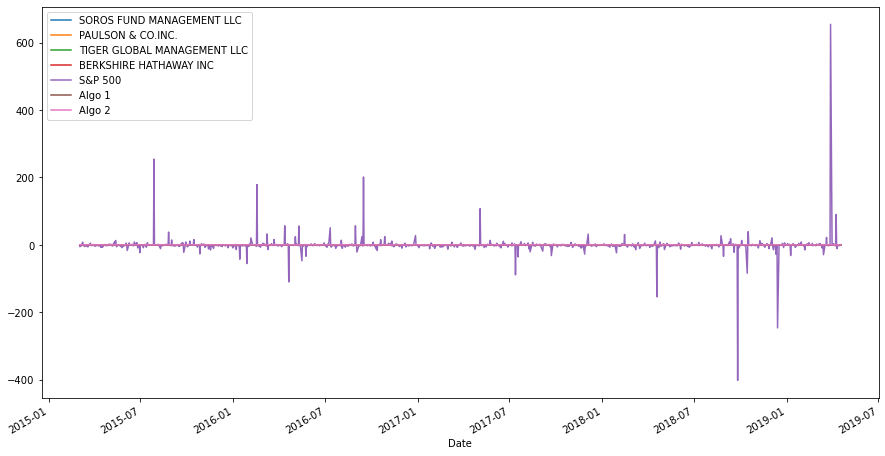

In [26]:
# plot daily returns
all_returns.plot(figsize=(15,8))

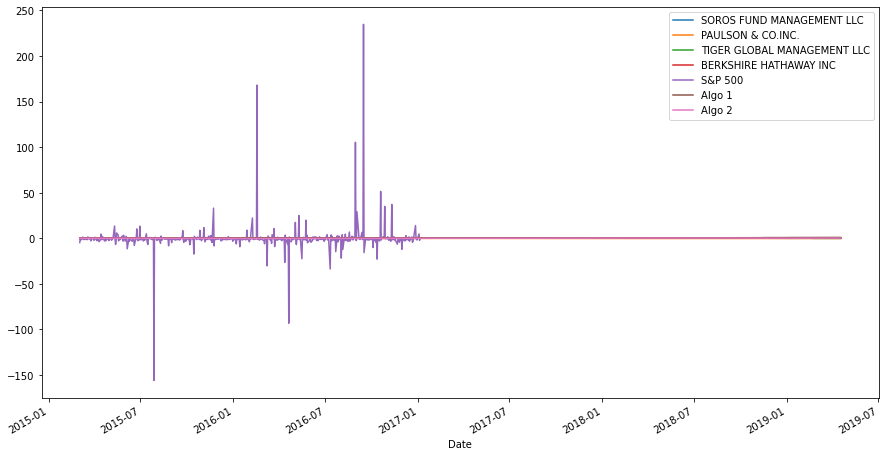

In [29]:
# plot cumulative returns
cumulative_returns = (1+all_returns).cumprod()-1
cumulative_returns.plot(figsize=(15,8))